# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [3]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.13.1


#### Loading in housing data as with SKLearn

In [4]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [49]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [50]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [56]:
# Split out a validation set for hyperparameter optimization



#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

### Visualize your training:



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()


Train on 18000 samples, validate on 2000 samples
Epoch 1/200
18000/18000 [==============================] - 1s 69us/step - loss: 416644724774.2293 - val_loss: 456240251273.2160
Epoch 2/200
18000/18000 [==============================] - 0s 14us/step - loss: 416219411047.3102 - val_loss: 455230525276.1600
Epoch 3/200
18000/18000 [==============================] - 0s 16us/step - loss: 414539373463.3245 - val_loss: 452292457267.2000
Epoch 4/200
18000/18000 [==============================] - 0s 14us/step - loss: 410731792826.3680 - val_loss: 446517339226.1120
Epoch 5/200
18000/18000 [==============================] - 0s 12us/step - loss: 403953550943.1182 - val_loss: 437057174896.6400
Epoch 6/200
18000/18000 [==============================] - 0s 11us/step - loss: 393657770544.6969 - val_loss: 423509280423.9360
Epoch 7/200
18000/18000 [==============================] - 0s 11us/step - loss: 379580761156.2667 - val_loss: 405581878001.6640
Epoch 8/200
18000/18000 [==============================

Epoch 65/200
18000/18000 [==============================] - 0s 10us/step - loss: 43967003383.1253 - val_loss: 48120822792.1920
Epoch 66/200
18000/18000 [==============================] - ETA: 0s - loss: 43677351207.822 - 0s 10us/step - loss: 43358731547.0791 - val_loss: 47560437465.0880
Epoch 67/200
18000/18000 [==============================] - 0s 10us/step - loss: 42763919989.8738 - val_loss: 47031392337.9200
Epoch 68/200
18000/18000 [==============================] - 0s 12us/step - loss: 42186531049.0169 - val_loss: 46524311076.8640
Epoch 69/200
18000/18000 [==============================] - 0s 12us/step - loss: 41641749632.3413 - val_loss: 46035936804.8640
Epoch 70/200
18000/18000 [==============================] - 0s 12us/step - loss: 41131274274.5884 - val_loss: 45590292496.3840
Epoch 71/200
18000/18000 [==============================] - 0s 13us/step - loss: 40640540990.5778 - val_loss: 45200045047.8080
Epoch 72/200
18000/18000 [==============================] - 0s 13us/step - lo

18000/18000 [==============================] - 0s 13us/step - loss: 33579016670.7769 - val_loss: 39000030150.6560
Epoch 130/200
18000/18000 [==============================] - 0s 12us/step - loss: 33535163312.8107 - val_loss: 38973689102.3360
Epoch 131/200
18000/18000 [==============================] - 0s 12us/step - loss: 33492335205.4898 - val_loss: 38930244927.4880
Epoch 132/200
18000/18000 [==============================] - 0s 12us/step - loss: 33455017304.9742 - val_loss: 38909504585.7280
Epoch 133/200
18000/18000 [==============================] - 0s 12us/step - loss: 33410613950.6916 - val_loss: 38849598160.8960
Epoch 134/200
18000/18000 [==============================] - 0s 12us/step - loss: 33375177029.8596 - val_loss: 38805699493.8880
Epoch 135/200
18000/18000 [==============================] - 0s 13us/step - loss: 33335135123.6836 - val_loss: 38765521666.0480
Epoch 136/200
18000/18000 [==============================] - 0s 13us/step - loss: 33302001097.8418 - val_loss: 3873150

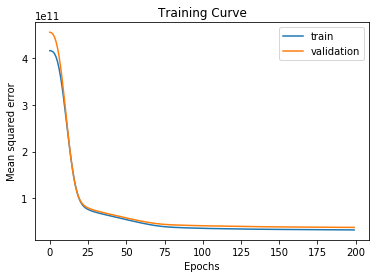

In [61]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=100, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

In [ ]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint


### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test